<h3>Transition matrices in Markov chains</h3>

the random surfer model sets up a
transition matrix with probability 1/L from a page with L links to each page it links to. Every time
the random surfer takes a step, we apply this transition matrix to the vector describing the
current probability of the random surfer being in a particular state. As the random surfer takes
more steps, we take higher and higher powers of the transition matrix. This process converges
to the dominant eigenvector of the transition matrix from any initial state of the random surfer.
The dominant eigenvector contains exactly the output of the PageRank algorithm — the
probabilities that the random surfer will visit each web page.

<h4>Citation graph</h4>

A citation graph is directed and acyclic, i.e. there are no loops in the graph.

<h4>Tasks</h4>
1. Construct a random surfer simulation that gives the same results as the PageRank
algorithm.
2. Visualize the PageRank results by varying node color in your network.
3. Draw a plot showing how the error in your simulation results decreases as the random
surfer simulation is run for more steps.




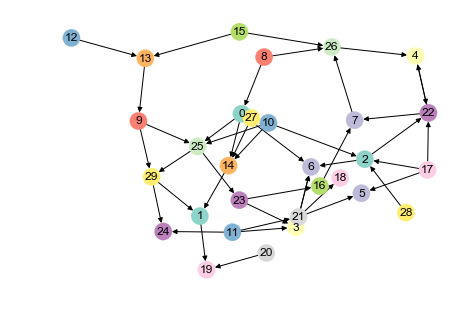

In [73]:
import networkx as nx
import numpy as np
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g),with_labels=True, cmap="Set3", node_color = [i for i in g.nodes])


In [74]:
def random_surfer(g, a=0.85, n=50):
    
    nx.set_node_attributes(g, 0, 'visited')
    curr_pos = np.random.choice(list(g))

    for i in range(n):

        if np.random.uniform() < a and len(list(g.neighbors(curr_pos))) > 0:
            #select a random neighbor
            random_neighbor = np.random.choice(list(g.neighbors(curr_pos)))
            curr_pos = random_neighbor
        else:
            #select a random node from the network
            random_nodes = list(g)
            random_nodes.remove(curr_pos)
            curr_pos = np.random.choice(random_nodes)
            
        g.node[curr_pos]['visited'] += 1
        
    page_ranks = [g.node[i]['visited']/n for i in list(g)]

    return np.array(page_ranks)

random_surfer(g)

array([0.  , 0.02, 0.06, 0.02, 0.14, 0.  , 0.06, 0.1 , 0.  , 0.02, 0.02,
       0.02, 0.04, 0.04, 0.02, 0.02, 0.02, 0.02, 0.  , 0.02, 0.  , 0.  ,
       0.16, 0.02, 0.02, 0.  , 0.1 , 0.  , 0.04, 0.02])

Text(0,0.5,'Average absolute difference between nx.pagerank and custom function')

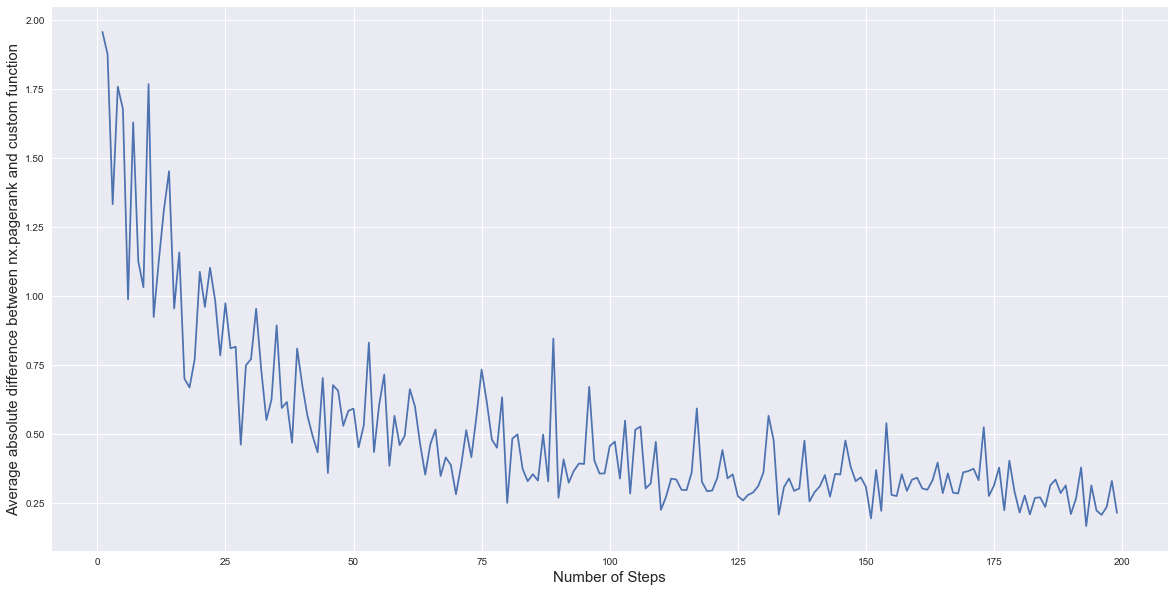

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

nx_pagerank = np.array(list(nx.pagerank(g).values())) 

diffs = []
for i in range(1,200):
    diffs.append(sum(abs(nx_pagerank - random_surfer(g, n=i))))
    
    
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,200), diffs)

plt.xlabel("Number of Steps", size=15)
plt.ylabel("Average absolute difference between nx.pagerank and custom function", size=15)

        
  
